In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [2]:
covid_df= pd.read_csv('covid_19_data.csv')
covid_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
print("Dataset shape:\n", covid_df.shape)
print("****************************************")
print("Null values:\n", covid_df.isnull().sum())
print("****************************************")
print("Data types:\n", covid_df.dtypes)

Dataset shape:
 (18327, 8)
****************************************
Null values:
 SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
****************************************
Data types:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
covid_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
covid_df.drop('SNo', axis = 1, inplace=True)

In [6]:
covid_df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'])

In [8]:
covid_df.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [9]:
##Grouping different types of cases per day
datewise = covid_df.groupby(['ObservationDate']).agg({"Confirmed":"sum",
                                                     "Deaths":"sum",
                                                     "Recovered":"sum"})

In [10]:
print("----Basic Information----\n")
print("Total Confirmed Cases:\n", datewise['Confirmed'].iloc[-1])
print("************************************")
print("Total Deaths:\n", datewise['Deaths'].iloc[-1])
print("************************************")
print("Total Recovered:\n", datewise['Recovered'].iloc[-1])
print("************************************")
print("Total no. of Active Cases:\n", (datewise['Confirmed'].iloc[-1] - datewise['Recovered'].iloc[-1] - datewise['Deaths'].iloc[-1]))
print("************************************")
print("Total no. of Closed Cases:\n", (datewise['Recovered'].iloc[-1] + datewise['Deaths'].iloc[-1]))

----Basic Information----

Total Confirmed Cases:
 2811193.0
************************************
Total Deaths:
 197159.0
************************************
Total Recovered:
 793601.0
************************************
Total no. of Active Cases:
 1820433.0
************************************
Total no. of Closed Cases:
 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

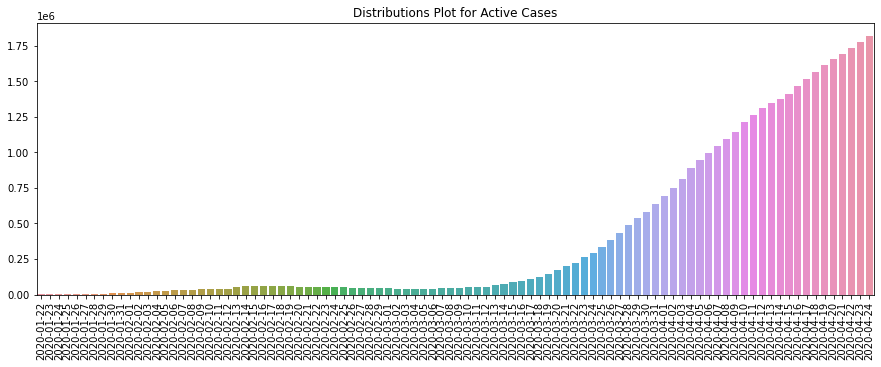

In [11]:
plt.figure(figsize = (15,5))
sns.barplot(x = datewise.index.date, y = datewise['Confirmed'] - datewise['Recovered'] - datewise['Deaths'])
plt.title("Distributions Plot for Active Cases")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

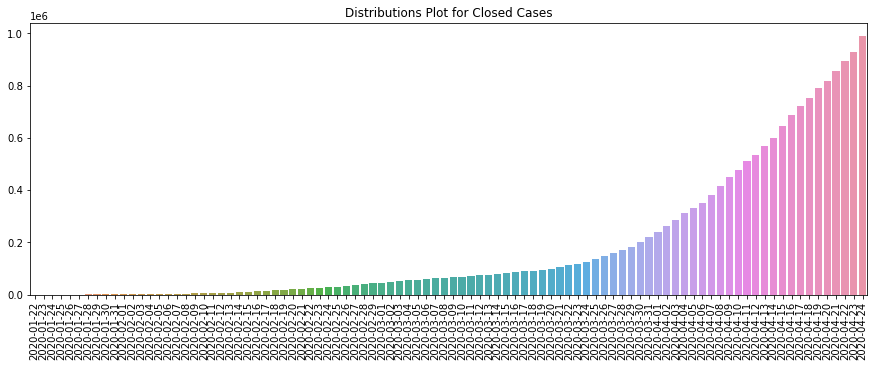

In [12]:
plt.figure(figsize = (15,5))
sns.barplot(x = datewise.index.date, y = datewise['Recovered'] + datewise['Deaths'])
plt.title("Distributions Plot for Closed Cases")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

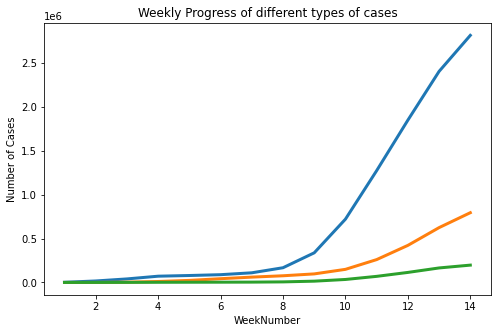

In [13]:
datewise['WeekofYear'] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise['WeekofYear'].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"] == i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"] == i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"] == i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num, weekwise_confirmed, linewidth=3)
plt.plot(week_num, weekwise_recovered, linewidth=3)
plt.plot(week_num, weekwise_deaths, linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different types of cases")

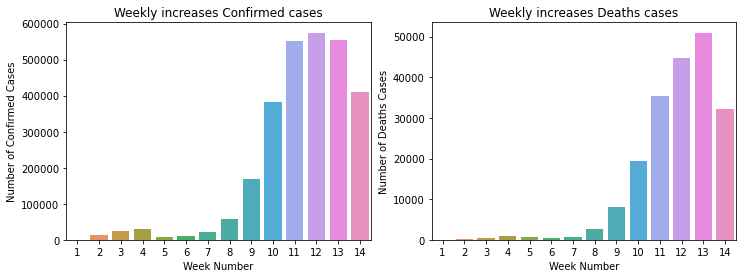

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0), ax = ax1)
sns.barplot(x=week_num, y = pd.Series(weekwise_deaths).diff().fillna(0), ax = ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Deaths Cases")
ax1.set_title("Weekly increases Confirmed cases")
ax2.set_title("Weekly increases Deaths cases")
plt.show()

-----------------------------------------------------------------
Average increases no. of Confirmed cases everyday:  29900.0
Average increases no. of Recovered cases everyday:  8442.0
Average increases no. of Deaths cases everyday:  2097.0
-----------------------------------------------------------------


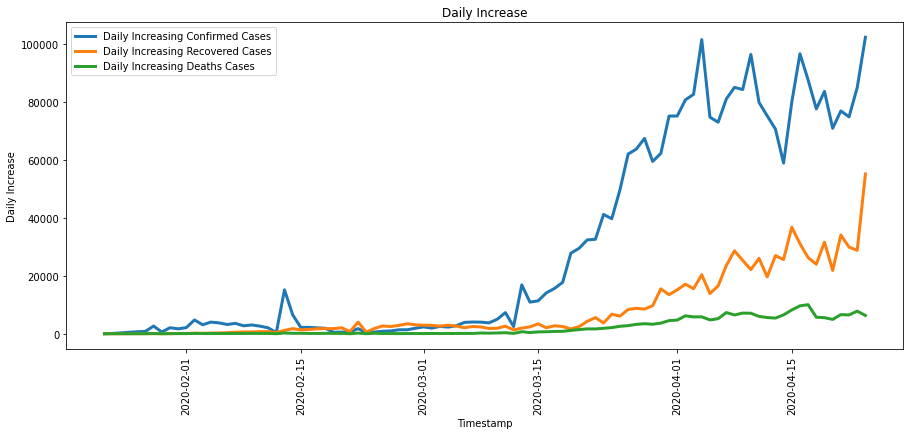

In [15]:
print("-----------------------------------------------------------------")
print("Average increases no. of Confirmed cases everyday: ", np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print("Average increases no. of Recovered cases everyday: ", np.round(datewise['Recovered'].diff().fillna(0).mean()))
print("Average increases no. of Deaths cases everyday: ", np.round(datewise['Deaths'].diff().fillna(0).mean()))
print("-----------------------------------------------------------------")
plt.figure(figsize = (15,6))
plt.plot(datewise['Confirmed'].diff().fillna(0), label = "Daily Increasing Confirmed Cases", linewidth = 3)
plt.plot(datewise['Recovered'].diff().fillna(0), label = "Daily Increasing Recovered Cases", linewidth = 3)
plt.plot(datewise['Deaths'].diff().fillna(0), label = "Daily Increasing Deaths Cases", linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [16]:
##Country wise Analysis
##Calculating Country wise Mortality rate
countrywise = covid_df[covid_df['ObservationDate'] == covid_df['ObservationDate'].max()].groupby(['Country/Region']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(['Confirmed'], ascending = False)
countrywise['Mortality'] = (countrywise['Deaths']/countrywise['Recovered']) * 100
countrywise['Recovery'] =  (countrywise['Recovered']/countrywise['Confirmed']) * 100

Text(0.5, 1.0, 'Top 15 Countries as per deaths cases')

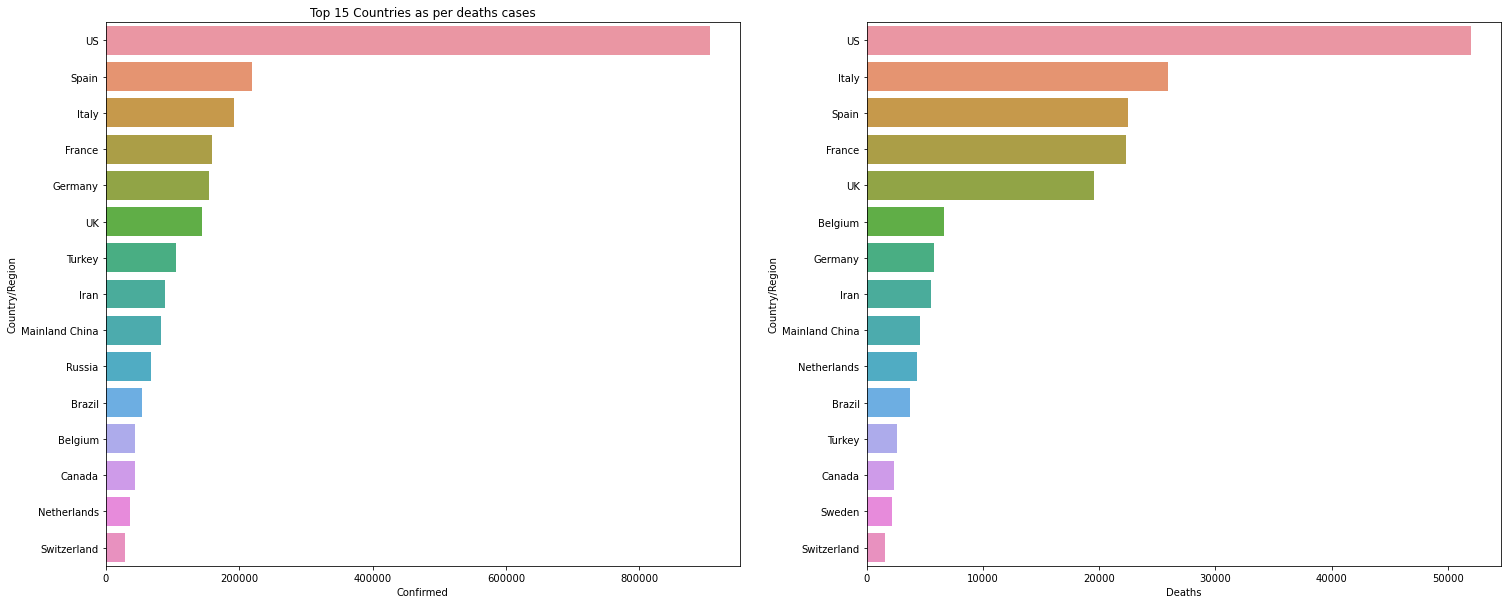

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15_confirmed = countrywise.sort_values(['Confirmed'], ascending=False).head(15)
top_15_deaths = countrywise.sort_values(['Deaths'], ascending=False).head(15)
sns.barplot(x = top_15_confirmed['Confirmed'], y = top_15_confirmed.index, ax = ax1)
ax1.set_title("Top 15 Countries as per confirmed cases")
sns.barplot(x = top_15_deaths['Deaths'], y = top_15_deaths.index, ax = ax2)
ax1.set_title("Top 15 Countries as per deaths cases")

In [18]:
##Data Analysis for India
india_data = covid_df[covid_df['Country/Region'] == "India"]
datewise_india = india_data.groupby(['ObservationDate']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("--------------------------------")
print(datewise_india.iloc[-1])
print("--------------------------------")
print("Total Active Cases:\n", datewise_india['Confirmed'].iloc[-1] - datewise_india['Recovered'].iloc[-1] - datewise_india['Deaths'].iloc[-1])
print("--------------------------------")
print("Total Closed Cases:\n", datewise_india['Recovered'].iloc[-1] + datewise_india['Deaths'].iloc[-1])

--------------------------------
Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
--------------------------------
Total Active Cases:
 18252.0
--------------------------------
Total Closed Cases:
 6278.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

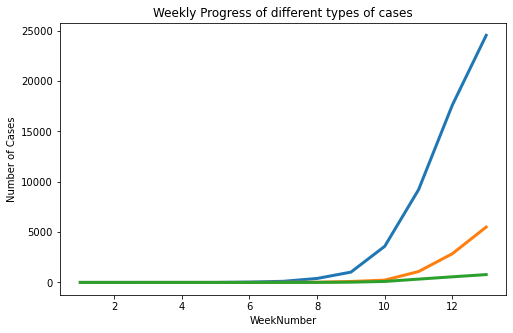

In [19]:
datewise_india['WeekofYear'] = datewise_india.index.weekofyear
week_num_india = []
weekwise_confirmed_india = []
weekwise_recovered_india = []
weekwise_deaths_india = []
w = 1
for i in list(datewise_india['WeekofYear'].unique()):
    weekwise_confirmed_india.append(datewise_india[datewise_india["WeekofYear"] == i]["Confirmed"].iloc[-1])
    weekwise_recovered_india.append(datewise_india[datewise_india["WeekofYear"] == i]["Recovered"].iloc[-1])
    weekwise_deaths_india.append(datewise_india[datewise_india["WeekofYear"] == i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india, weekwise_confirmed_india, linewidth=3)
plt.plot(week_num_india, weekwise_recovered_india, linewidth=3)
plt.plot(week_num_india, weekwise_deaths_india, linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different types of cases")

In [20]:
max_ind = datewise_india['Confirmed'].max()
china_data = covid_df[covid_df['Country/Region'] == "Mainland China"]
italy_data = covid_df[covid_df['Country/Region'] == "Italy"]
us_data = covid_df[covid_df['Country/Region'] == "US"]
spain_data = covid_df[covid_df['Country/Region'] == "Spain"]

datewise_china = china_data.groupby(['ObservationDate']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_italy = italy_data.groupby(['ObservationDate']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_us = us_data.groupby(['ObservationDate']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_spain = spain_data.groupby(['ObservationDate']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [21]:
print("It took", datewise_india[datewise_india['Confirmed'] > 0].shape[0], "days in India to reach", max_ind, "Confirmed cases")
print("It took", datewise_china[(datewise_china['Confirmed'] > 0) & (datewise_china['Confirmed']<= max_ind)].shape[0], "days in China to reachnumber of Confirmed cases")
print("It took", datewise_italy[(datewise_italy['Confirmed'] > 0) & (datewise_italy['Confirmed']<= max_ind)].shape[0], "days in Italy to reach number of Confirmed cases")
print("It took", datewise_us[(datewise_us['Confirmed'] > 0) & (datewise_us['Confirmed']<= max_ind)].shape[0], "days in US to reach number of Confirmed cases")
print("It took", datewise_spain[(datewise_spain['Confirmed'] > 0) & (datewise_spain['Confirmed']<= max_ind)].shape[0], "days in Spain to reach number of Confirmed cases")

It took 86 days in India to reach 24530.0 Confirmed cases
It took 14 days in China to reachnumber of Confirmed cases
It took 44 days in Italy to reach number of Confirmed cases
It took 59 days in US to reach number of Confirmed cases
It took 49 days in Spain to reach number of Confirmed cases


In [22]:
datewise["Days Since"] = datewise.index - datewise.index[0]
datewise["Days Since"] = datewise['Days Since'].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0] * 0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0] * 0.95):]
ml_scores = []

In [23]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C = 1, degree = 5, kernel='poly', epsilon=0.001)

lin_reg.fit(np.array(train_ml['Days Since']).reshape(-1,1), np.array(train_ml['Confirmed']).reshape(-1,1))
svm.fit(np.array(train_ml['Days Since']).reshape(-1,1), np.array(train_ml['Confirmed']).reshape(-1,1))

F:\ancnd\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [24]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml['Days Since']).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml['Days Since']).reshape(-1,1))

In [25]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1] + timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise['Days Since'].max() + i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise['Days Since'].max() + i).reshape(-1,1))[0])
    
pd.set_option("Display.float_format", lambda x: '%.f' %x)
model_predictions = pd.DataFrame(zip(new_date, new_prediction_lr, new_prediction_svm), columns = ['Dates','LR','SVR'])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245
5,2020-04-30,1668980,4292557
6,2020-05-01,1690670,4511540
7,2020-05-02,1712360,4739461
8,2020-05-03,1734050,4976588
9,2020-05-04,1755740,5223200


In [26]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[int(datewise.shape[0]*0.85):]

In [27]:
holt = Holt(np.asarray(model_train['Confirmed'])).fit(smoothing_level=1.4, smoothing_slope=0.2)
y_pred = valid.copy()
y_pred['Holt'] = holt.forecast(len(valid))

F:\ancnd\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [28]:
holt_new_date = []
holt_new_prediction = []
for i in range(1,18):
    holt_new_date.append(datewise.index[-1] + timedelta(days = i))
    holt_new_prediction.append(holt.forecast((len(valid) + i))[-1])

model_predictions["Holts Linear Regression Model"] = holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Regression Model
0,2020-04-25,1560529,3322586,2855246
1,2020-04-26,1582219,3500761,2933902
2,2020-04-27,1603909,3686599,3012558
3,2020-04-28,1625599,3880344,3091214
4,2020-04-29,1647289,4082245,3169870
